<img src="images/cost_function.png"/>

# Cost Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

%matplotlib inline

## Problem Statement
You would like a model which can predict housing prices given the size of the house. A house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \$500,000.

| Size (1000 sqft) | Price (1000s of dollars)|
|-----|-----|
| 1.0 | 300 |
| 2.0 | 500 |

In [2]:
x_train = np.array([1.0, 2.0])           # size (in 1000 square feet)
y_train = np.array([300.0, 500.0])       # price (in 1000s of dollars)

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


<img src="images/computing_cost.png"/>

In [3]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

## Compute Model

In [4]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]     # number of rows
    f_wb = np.zeros(m) # create a array
    
    for i in range(m):
        
        f_wb[i] = w * x[i] + b
        
    return f_wb

## W and B fixed

(0.0, 400.0)

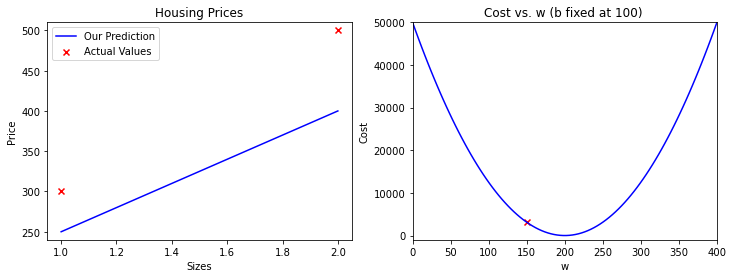

In [5]:
w = 150
b = 100
w_bar = np.linspace(0,400,100)

# Plot two graphs

tmp_f_wb = compute_model_output(x_train, w, b,)
cost = compute_cost(x_train, y_train, w, b)
costB = compute_cost(x_train, y_train, w_bar, b)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)     # plt.subplot(nrows, ncols, plot_number)
plt.title('Housing Prices')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values') # Plot the data points
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')              # Plot model
plt.xlabel('Sizes')
plt.ylabel('Price')
plt.legend()
plt.ylim(240, 510)
plt.xlim(0.95, 2.05)

plt.subplot(1,2,2)
plt.title('Cost vs. w (b fixed at 100) ')
plt.scatter(w, cost, marker='x', c='r',label='Actual Value')   # Plot actual cost
plt.plot(w_bar, costB, c='b',label='Our Prediction')          # Plot J curve
plt.xlabel('w')
plt.ylabel('Cost')
plt.ylim(-1000, 50000)
plt.xlim(0, 400)

## Dinamic Visualization

In [6]:
def move(w):
    
    b = 100
    w_bar = np.linspace(0,400,100)

    # Plot two graphs

    tmp_f_wb = compute_model_output(x_train, w, b,)
    cost = compute_cost(x_train, y_train, w, b)
    costB = compute_cost(x_train, y_train, w_bar, b)

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)     # plt.subplot(nrows, ncols, plot_number)
    plt.title('Housing Prices')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values') # Plot the data points
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')              # Plot model
    plt.xlabel('Sizes')
    plt.ylabel('Price')
    plt.legend()
    plt.ylim(200, 600)
    plt.xlim(0.95, 2.05)

    plt.subplot(1,2,2)
    plt.title('Cost vs. w (b fixed at 100) ')
    plt.scatter(w, cost, marker='x', c='r',label=f'Cost at w = {w}')   # Plot actual cost
    plt.plot(w_bar, costB, c='b')                   # Plot J curve
    plt.xlabel('w')
    plt.ylabel('Cost')
    plt.legend()
    plt.ylim(-5000, 50000)
    plt.xlim(0, 400)
    
    print(f'For w = {w}, Cost = {cost}')
    
# Parameter's Control    
gbm_controls = widgets.interactive(move, 
                                   w=widgets.IntSlider(min=0, max=400, step=10, value=1))
# Display
display(gbm_controls)

interactive(children=(IntSlider(value=1, description='w', max=400, step=10), Output()), _dom_classes=('widget-…